<a href="https://colab.research.google.com/github/meswaramoorthy/mlcourse_ods/blob/master/mlcourse_ods/Assignment/Assignment01/Notebook/ODS_Assignment1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/My Drive

/content/drive/My Drive


In [6]:
cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [7]:
ls

DataSets/


In [0]:
# Python's Linear Algebra library
import numpy as np
# Data processing and CSV file i/o library
import pandas as pd
# Python graphics library
import seaborn as sns
import matplotlib.pyplot as plt
# Current version of seaborn generates a bunch of warnings that will be ignored.
import warnings

In [0]:
#In order to reduce memory footprint, we load only needed columns 
#and cast them to suitable types.

dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [10]:
#Reading data into memory and creating a Pandas DataFrame object

%%time
flights_df = pd.read_csv('./DataSets/2008.csv.bz2', usecols = dtype.keys(),
                        dtype = dtype)

CPU times: user 55.1 s, sys: 897 ms, total: 56 s
Wall time: 56 s


In [11]:
#Check the number of rows and columns and print column names.

print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [12]:
#Print first 5 rows of the dataset.

flights_df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [13]:
#Transpose the frame to see all features at once.

flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


In [14]:
#Examine data types of all features and total dataframe size in memory.

flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


In [15]:
#Get basic statistics of each feature.

flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


In [16]:
flights_df['UniqueCarrier'].value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

In [17]:
#Count unique Carriers and plot their relative share of flights

flights_df['UniqueCarrier'].nunique()
#help(flights_df['UniqueCarrier'].nunique)

20

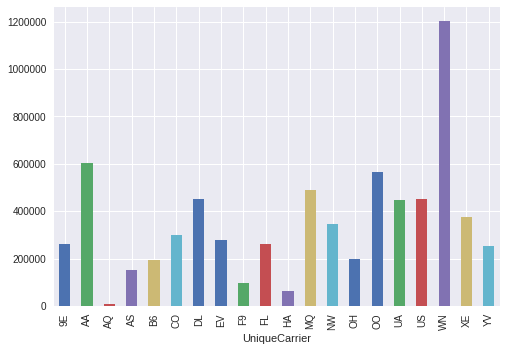

In [18]:
flights_df.groupby('UniqueCarrier').size().plot(kind = 'bar')
#type(flights_df.groupby('UniqueCarrier').size())

In [19]:
# finding top-3 flight codes,that have the largest 
# total distance travelled in year 2008.

grouped = flights_df.groupby(['UniqueCarrier', 'FlightNum'])
grouped['Distance'].sum().sort_values(ascending = False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

In [20]:
#Another method

grouped.agg({'Distance' : [np.mean, np.sum, 'count'],
            'Cancelled' : np.sum})\
    .sort_values(('Distance', 'sum'), ascending = False)\
    .iloc[:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

In [21]:
#Number of flights by days of week and months:

pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


In [22]:
flights_df.groupby(['Month', 'DayOfWeek']).size()

Month  DayOfWeek
1      1             80807
       2             97298
       3            100080
       4            102043
       5             81940
       6             67178
       7             76419
2      1             81504
       2             79700
       3             80587
       4             82158
       5            102726
       6             66462
       7             76099
3      1            103210
       2             81159
       3             82307
       4             82831
       5             82936
       6             86153
       7             97494
4      1             82463
       2            100785
       3            102586
       4             82799
       5             82964
       6             68304
       7             78225
5      1             80626
       2             79884
                     ...  
8      6             86155
       7             93970
9      1             94300
       2             91533
       3             74057
       4   

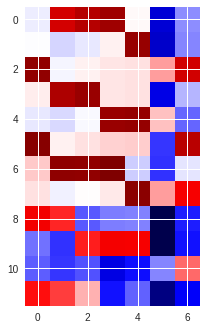

In [23]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

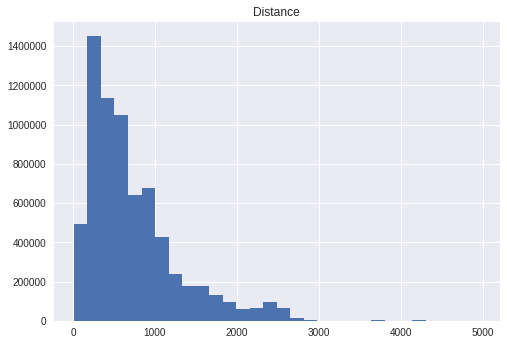

In [24]:
# Flight distance histogram:

flights_df.hist('Distance', bins = 30)
plt.show()

In [25]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns = {'DayofMonth' : 'Day'})[['Year','Month','Day']])
flights_df.sample(n=5).T
#help(pd.to_datetime)

,4253136,833022,1569305,3170145,887576
Year,2008,2008,2008,2008,2008
Month,8,2,3,6,2
DayofMonth,8,11,9,4,1
DayOfWeek,5,1,7,3,5
DepTime,1905,NaN,1734,1847,1435
UniqueCarrier,WN,UA,MQ,OO,WN
FlightNum,1978,759,3392,5465,1188
ArrDelay,17,NaN,6,75,29
DepDelay,15,NaN,-1,72,25
Origin,SFO,PHL,LBB,LAX,SAT


In [26]:
flights_groupedby_date = flights_df.groupby('Date')
flights_groupedby_date.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03
2367,2008,1,4,5,2003.0,WN,746,87.0,78.0,ABQ,AMA,277,0,NaN,0.0,0.0,9.0,0.0,78.0,2008-01-04
2368,2008,1,4,5,906.0,WN,2126,-13.0,1.0,ABQ,BWI,1670,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-04
2369,2008,1,4,5,1444.0,WN,45,2.0,9.0,ABQ,DAL,580,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-04
2370,2008,1,4,5,656.0,WN,87,0.0,1.0,ABQ,DAL,580,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-04
2371,2008,1,4,5,2204.0,WN,230,110.0,108.0,ABQ,DAL,580,0,NaN,1.0,0.0,2.0,0.0,107.0,2008-01-04


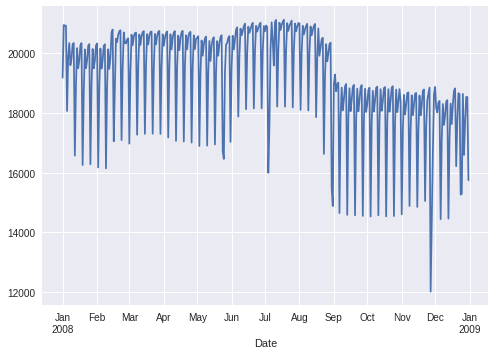

In [27]:
#Making a histogram of flight frequency by date.
num_flights_daily = flights_groupedby_date.size()
num_flights_daily.plot()
plt.show()

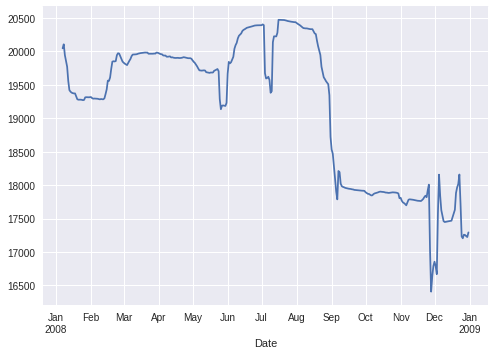

In [28]:
#Weekly trends

num_flights_daily.rolling(window = 7).mean().plot()
plt.show()

In [29]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace = 24, value = 0, inplace = True)
flights_df.sample(n = 5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour
3062926,2008,6,23,1,2104.0,WN,1253,-12.0,-6.0,AUS,...,148,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-23,21.0
5928396,2008,10,4,6,106.0,DL,1192,10.0,-4.0,ANC,...,2125,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-04,1.0
3883426,2008,7,10,4,1314.0,US,1652,-30.0,-6.0,CLT,...,529,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-07-10,13.0
6605121,2008,12,5,5,1810.0,OH,6704,4.0,-5.0,BWI,...,184,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-05,18.0
6902087,2008,12,11,4,1931.0,AA,426,-16.0,-4.0,IAH,...,224,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-12-11,19.0


In [30]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

**1. How many unique carriers are there in our dataset?**

In [31]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference? **

In [32]:
canceled = flights_df['Cancelled'].value_counts()
canceled[0] - canceled[1]

6734860

In [33]:
flights_df['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

In [34]:
max_dep_delay_dest = flights_df.iloc[flights_df['DepDelay'].idxmax()]['Dest']
max_arr_delay_dest = flights_df.iloc[flights_df['ArrDelay'].idxmax()]['Dest']
print(max_dep_delay_dest, max_arr_delay_dest)

MSP MSP


**4. Find the carrier that has the greatest number of cancelled flights.**

In [35]:
flights_df.groupby(['UniqueCarrier'])\
  .agg({'Cancelled': np.sum})\
  .sort_values(('Cancelled'), ascending=False)\
  .iloc[0:3]
  

,Cancelled
UniqueCarrier,
MQ,18331.0
AA,17440.0
OO,12436.0


**5. Let's examine departure time and consider distribution by hour (column DepHour that we've created earlier). Which hour has the highest percentage of flights?**

In [36]:
flights_df.groupby('DepHour')\
  .apply(np.size).sort_values(ascending = False)

DepHour
8.0     9433704
6.0     9381477
11.0    9338742
7.0     9170700
13.0    9154257
9.0     9131850
16.0    9114357
17.0    9082248
10.0    9060660
12.0    8909229
14.0    8754375
15.0    8633646
18.0    8416464
19.0    8133048
20.0    6005811
21.0    5351850
5.0     3111507
22.0    2512671
23.0     968163
0.0      427728
1.0      123081
4.0       71190
2.0       38871
3.0       17493
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae50489198>]],
      dtype=object)

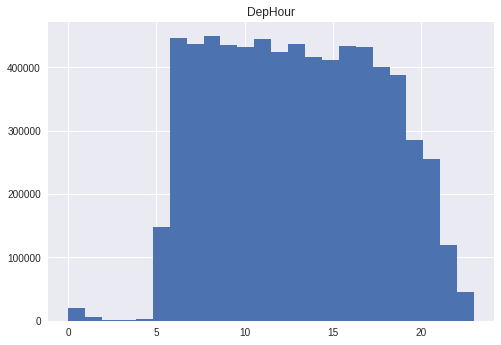

In [37]:
flights_df.hist('DepHour', bins = 24)

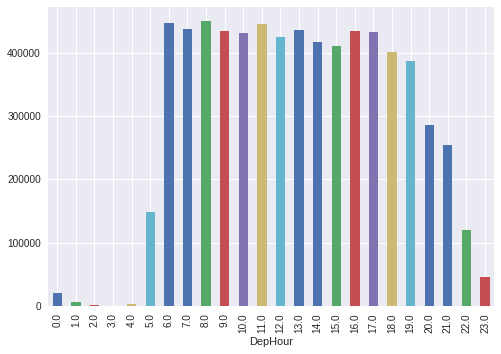

In [38]:
flights_df.groupby('DepHour').size().plot(kind = 'bar')

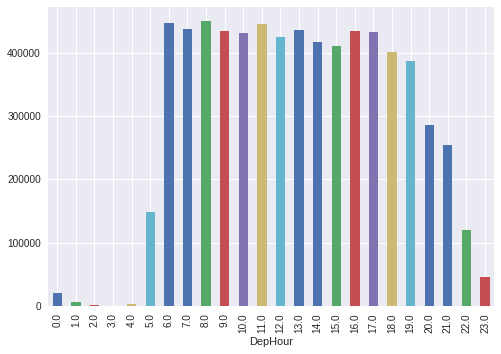

In [39]:
flights_df.groupby('DepHour').size().plot(kind = 'bar')

**Answer:** 8am

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**

In [135]:
flights_cancelled_df = flights_df.loc[flights_df['Cancelled'] == 1]

In [136]:
flights_cancelled_grouped = flights_cancelled_df.groupby('DepHour')
no_of_cancelled_flights = flights_cancelled_grouped.size()
no_of_cancelled_flights.sort_values(ascending = True).iloc[:5]

DepHour
2.0      1
4.0      1
1.0      4
0.0      7
23.0    24
dtype: int64

**Answer:** 2 am

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

In [137]:
flights_dephour_grouped = flights_df.groupby('DepHour')
len(flights_dephour_grouped) - len(flights_cancelled_grouped)

1

In [138]:
print(flights_dephour_grouped.groups.keys())
print(flights_cancelled_grouped.groups.keys())

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0])
dict_keys([0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0])


**Answer:** 3 am

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.

Hint: Consider only completed flights.

In [139]:
flights_completed_df = flights_df.loc[flights_df['Cancelled'] == 0]
flights_completed_dephr_grouped = flights_completed_df.groupby('DepHour')

In [140]:
flights_completed_dephr_grouped.size().sort_values(ascending = False).iloc[:3]

DepHour
8.0     449145
6.0     446657
11.0    444643
dtype: int64

**Answer:** 8 am

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?

Hint: Consider only completed flights.

In [141]:
# Number of flights with early departure
flights_early_dep_grouped = flights_completed_df.loc[flights_completed_df['DepDelay'] < 0]\
                                .groupby('DepHour')

flights_early_dep_grouped.size().sort_values(ascending = False).iloc[:10]

DepHour
6.0     316527
7.0     296237
8.0     289062
9.0     258571
10.0    242340
11.0    239397
12.0    221688
13.0    216606
16.0    206971
14.0    201843
dtype: int64

In [142]:
# Average dep delay by dephour

flights_completed_dephr_grouped.agg({'DepDelay' : np.mean}).sort_values(by = 'DepDelay', ascending = True).iloc[:3]

,DepDelay
DepHour,
5.0,-4.253906
6.0,-1.629883
7.0,0.102539


**Answer** Yes, at 5-6 am

**10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**

In [143]:
# Carrier found - MQ

flights_complete_MQ = flights_completed_df.loc[flights_completed_df['UniqueCarrier'] == 'MQ']
flights_complete_MQ_grouped =  flights_complete_MQ.groupby('DepHour')
flights_complete_MQ_grouped.size().sort_values(ascending = False).iloc[:5]

DepHour
10.0    33063
9.0     32596
11.0    31863
13.0    31295
16.0    31276
dtype: int64

**Answer:** At 10 AM

**11. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?**

**Which of the listed below is *not* in your top-10 list?**

In [144]:
flights_completed_gr_carrier = flights_completed_df.groupby('UniqueCarrier')
flights_completed_gr_carrier.size().sort_values(ascending = False).iloc[:10]

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

**Answer:** EV

**12. Plot distributions of flight cancellation reasons (CancellationCode).**

**What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)**

CancellationCode
B    54904
A    54330
C    28188
D       12
dtype: int64


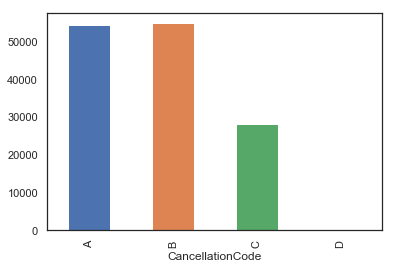

In [145]:
delays = ['Carrier Delay', 'Weather Delay', 'National Air System',
          'Security']
flights_cancelled_grpby_Code = flights_cancelled_df.groupby('CancellationCode')
print(flights_cancelled_grpby_Code.size().sort_values(ascending = False))
flights_cancelled_grpby_Code.size().plot(kind = 'bar');

**Answer:** Weather Conditions

**13. Which route is the most frequent, in terms of the number of flights**

(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)


In [146]:
flights_grouped_routes = flights_df.groupby(['Origin', 'Dest'])
flights_grouped_routes.size().sort_values(ascending = False).iloc[:3]

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
dtype: int64

**Answer:** San-Francisco – Los-Angeles (SFO-LAX)

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

Hint: consider only positive delays

In [147]:
flights_grouped_routes_delayed = flights_df[flights_df['DepDelay'] > 0]\
                                    .groupby(['Origin', 'Dest'])

In [148]:
flights_grouped_routes_delayed.size().sort_values(ascending = False)\
                            .iloc[:5]

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
dtype: int64

In [149]:
flights_subset = flights_df[((
            ((flights_df['Origin'] == 'LAX') 
           & (flights_df['Dest'] == 'SFO'))
           |((flights_df['Origin'] == 'DAL') 
           & (flights_df['Dest'] == 'HOU'))
            |((flights_df['Origin'] == 'SFO') 
           & (flights_df['Dest'] == 'LAX'))
            |((flights_df['Origin'] == 'ORD') 
           & (flights_df['Dest'] == 'LGA'))
            |((flights_df['Origin'] == 'HOU') 
           & (flights_df['Dest'] == 'DAL')))
            & (flights_df['WeatherDelay'] > 0
           ))]
flights_subset.shape

(668, 21)

In [150]:
flights_subset.sample(n = 5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DepHour
1229563,2008,3,19,3,1253.0,WN,2470,39.0,53.0,LAX,...,337,0,NaN,0.0,39.0,0.0,0.0,0.0,2008-03-19,12.0
3019835,2008,6,10,2,1432.0,WN,23,138.0,122.0,DAL,...,239,0,NaN,0.0,113.0,16.0,0.0,9.0,2008-06-10,14.0
6359390,2008,11,11,2,1824.0,AA,354,110.0,99.0,ORD,...,733,0,NaN,0.0,9.0,11.0,0.0,90.0,2008-11-11,18.0
2467548,2008,5,27,2,1920.0,WN,47,46.0,50.0,DAL,...,239,0,NaN,0.0,39.0,0.0,0.0,7.0,2008-05-27,19.0
6901412,2008,12,1,1,709.0,AA,394,62.0,24.0,ORD,...,733,0,NaN,0.0,24.0,38.0,0.0,0.0,2008-12-01,7.0


**Answer:** 668

**15. Examine the hourly distribution of departure times. Choose all correct statements:**

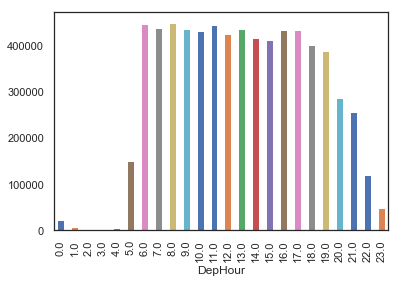

In [151]:
flights_df.groupby('DepHour').size().plot(kind = 'bar');

**Answer:**In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**

The number of flights during weekends is less than during weekdays (working days).<br>
The lowest number of flights is on Sunday.<br>
There are less flights during winter than during summer.

In [152]:
no_of_flights_day = flights_df.groupby('DayOfWeek').size()
flights_weekday = no_of_flights_day[:5].sum()
flights_weekend = no_of_flights_day[5:].sum()
print(flights_weekday)
print(flights_weekend)
flights_weekend < flights_weekday

5175305
1834423


True

**Observation 1:** The number of flights during weekends is less than during weekdays (working days).

In [153]:
no_of_flights_day

DayOfWeek
1    1036201
2    1032049
3    1039665
4    1032224
5    1035166
6     857536
7     976887
dtype: int64

**Observation 2:** The lowest number of flights is **not** on Sunday, but on Saturday

In [154]:
no_of_flights_month = flights_df.groupby('Month').size()
flights_summer = no_of_flights_month.iloc[5:8].sum()
flights_winter = no_of_flights_month.iloc[:2].sum() + no_of_flights_month.iloc[11]
print(flights_summer)
print(flights_winter)
flights_winter < flights_summer

1848875
1719959


True

**Observation 3:** There are less flights during winter than during summer.

**Answer:** <br>The number of flights during weekends is less than during weekdays (working days).<br>
There are less flights during winter than during summer.

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

Choose all correct statements:

October has the lowest number of cancellations due to weather.<br>
The highest number of cancellations in September is due to Security reasons.<br>
April's top cancellation reason is carriers.<br>
Flights cancellations due to National Air System are more frequent than those due to carriers.<br>

In [155]:
flights_cancelled_grpby_Month_Code = flights_cancelled_df.groupby(['Month','CancellationCode'])

In [156]:
flights_cancelled_grpby_Code_Month =  flights_cancelled_df.groupby(['CancellationCode', 'Month'])

In [157]:
print(delays)
flights_cancelled_grpby_Code_Month.size()

['Carrier Delay', 'Weather Delay', 'National Air System', 'Security']


CancellationCode  Month
A                 1         6635
                  2         6090
                  3         6038
                  4         7312
                  5         3157
                  6         4251
                  7         5292
                  8         3852
                  9         2246
                  10        2097
                  11        2510
                  12        4850
B                 1         6711
                  2        10034
                  3         7520
                  4         1479
                  5         1461
                  6         3448
                  7         2612
                  8         3582
                  9         6478
                  10         600
                  11         937
                  12       10042
C                 1         3962
                  2         4470
                  3         2621
                  4         1564
                  5         1608
                  6

**Observation 1:** October has the lowest number of cancellations due to weather.

In [158]:
print(delays)
flights_cancelled_grpby_Month_Code.size()

['Carrier Delay', 'Weather Delay', 'National Air System', 'Security']


Month  CancellationCode
1      A                    6635
       B                    6711
       C                    3962
2      A                    6090
       B                   10034
       C                    4470
       D                       2
3      A                    6038
       B                    7520
       C                    2621
       D                       4
4      A                    7312
       B                    1479
       C                    1564
5      A                    3157
       B                    1461
       C                    1608
       D                       3
6      A                    4251
       B                    3448
       C                    3232
7      A                    5292
       B                    2612
       C                    2694
8      A                    3852
       B                    3582
       C                    2401
9      A                    2246
       B                    6478
       C           

**Observation 2:** The highest number of cancellations in September is **not** due to Security reasons.

**Observation 3:** April's top cancellation reason is carriers.

In [159]:
print(delays)
flights_cancelled_grpby_Code.size()

['Carrier Delay', 'Weather Delay', 'National Air System', 'Security']


CancellationCode
A    54330
B    54904
C    28188
D       12
dtype: int64

**Observation 4:** Flights cancellations due to National Air System are **not** more frequent than those due to carriers.

**Answer:**<br>
 October has the lowest number of cancellations due to weather.<br>
 April's top cancellation reason is carriers.<br>

**18. Which month has the greatest number of cancellations due to Carrier?**

In [160]:
flights_cancelled_grpby_Code_Month.size()['A'].idxmax()

4

**Observation:** April has the highest cancellation due to Carrier.<br>
**Answer:** April

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

In [161]:
flights_cancelled_grpby_Code_Month.get_group(('A', 4))\
                                    .groupby('UniqueCarrier')\
                                    .size()\
                                    .sort_values(ascending = False)\
                                    .iloc[:5]


UniqueCarrier
AA    3696
WN     533
UA     494
YV     454
9E     391
dtype: int64

**Answer:** AA

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). (Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

In [162]:
#flights_depdelay = flights_completed_df[flights_completed_df['DepDelay'] > 0]
#flights_arrdelay =  flights_completed_df[flights_completed_df['ArrDelay'] > 0]

flights_delayed = flights_completed_df[(flights_completed_df['DepDelay'] > 0)
                                      |(flights_completed_df['ArrDelay'] > 0)]
flights_delayed.shape

(3630770, 21)

In [163]:
flights_delayed_grp_carrier = flights_delayed.groupby('UniqueCarrier')
flights_delayed_grp_carrier.agg({'DepDelay' : np.median,
                                 'ArrDelay' : np.median})\
        .sort_values(by = ['DepDelay','ArrDelay'], ascending = True)\
        .iloc[:5]

,DepDelay,ArrDelay
UniqueCarrier,,
AQ,2.0,4.0
HA,2.0,6.0
NW,3.0,12.0
US,4.0,9.0
DL,4.0,10.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D08028BE10>,
      dtype=object)

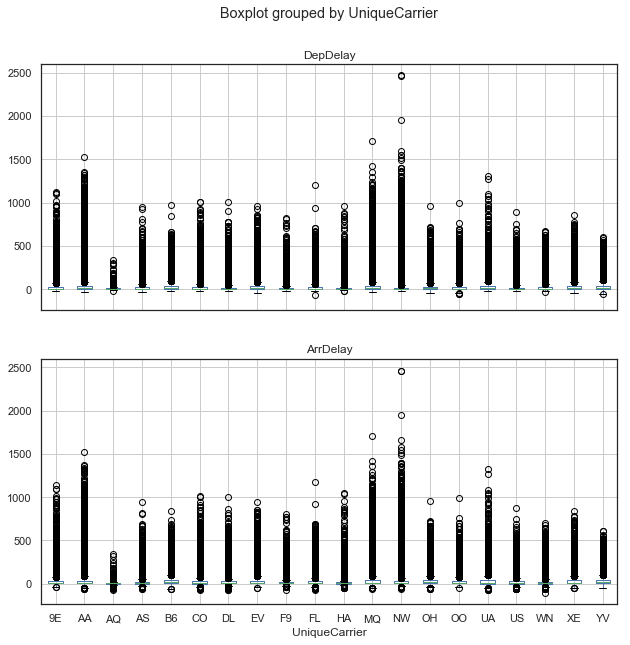

In [174]:
flights_delayed.boxplot(by = 'UniqueCarrier',
                        column = ['DepDelay', 'ArrDelay'],
                        figsize = (10, 10),
                       layout = (2,1))

In [165]:
flights_depdelay = flights_completed_df[flights_completed_df['DepDelay'] > 0]
flights_arrdelay =  flights_completed_df[flights_completed_df['ArrDelay'] > 0]

In [166]:
np.percentile(flights_arrdelay.ArrDelay,95)

122.0

In [167]:
np.percentile(flights_depdelay.DepDelay,95)

122.0

In [168]:
flights_depdelay = flights_depdelay[(flights_depdelay.DepDelay < np.percentile(flights_depdelay.DepDelay,95))]
flights_arrdelay =  flights_arrdelay[(flights_arrdelay.ArrDelay < np.percentile(flights_arrdelay.ArrDelay,95))]

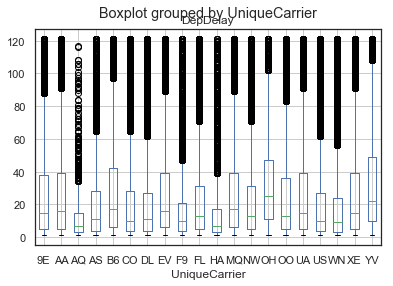

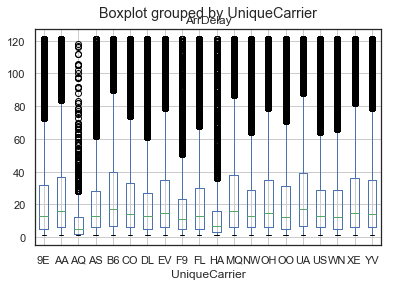

In [169]:
flights_depdelay.boxplot(by = 'UniqueCarrier', column = ['DepDelay'])
flights_arrdelay.boxplot(by = 'UniqueCarrier', column = ['ArrDelay'])

In [170]:
flights_depdelay.groupby('UniqueCarrier').agg({'DepDelay' : np.median})\
                .sort_values(by='DepDelay', ascending = True)\
                .iloc[:3]

,DepDelay
UniqueCarrier,
AQ,7.0
HA,7.0
WN,9.0


In [171]:
flights_arrdelay.groupby('UniqueCarrier').agg({'ArrDelay' : np.median})\
                .sort_values(by='ArrDelay', ascending = True)\
                .iloc[:3]

,ArrDelay
UniqueCarrier,
AQ,5.0
HA,7.0
F9,11.0


**Answer:** AQ